# Zadanie 1

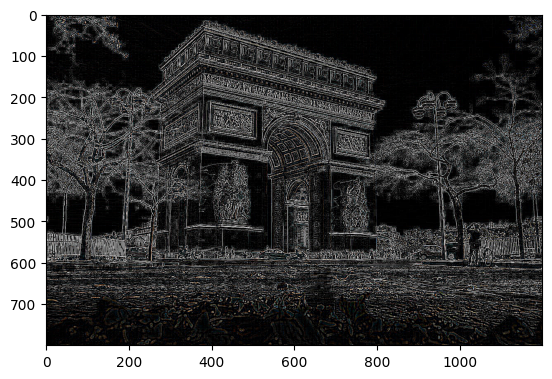

In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
]
kernel = np.asarray(kernel)

filtered_image = cv.filter2D(image, -1, kernel=kernel) 
plt.imshow(filtered_image)

# Zadanie 2

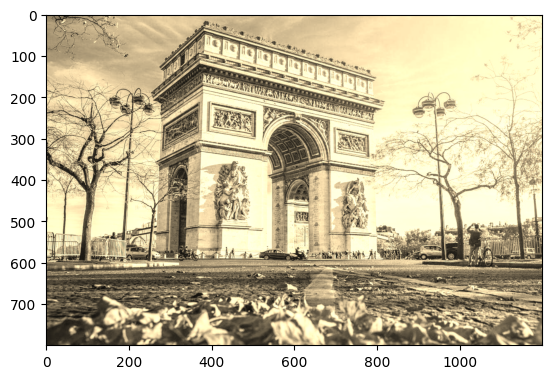

In [44]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

mask = np.array([
    [ 0.393,  0.769 ,  0.189],
    [ 0.349 ,  0.689 , 0.168],
    [ 0.272, 0.534 ,  0.131]
])

img = cv.imread("images/example.jpg",)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        color = img[x, y, :]
        color = color / 255.0
        new_color = np.matmul(mask, color)
        new_color = [255 if x * 255 > 255 else x * 255 for x in new_color]
        img[x, y, :] = new_color

plt.imshow(img)

# Zadanie 3

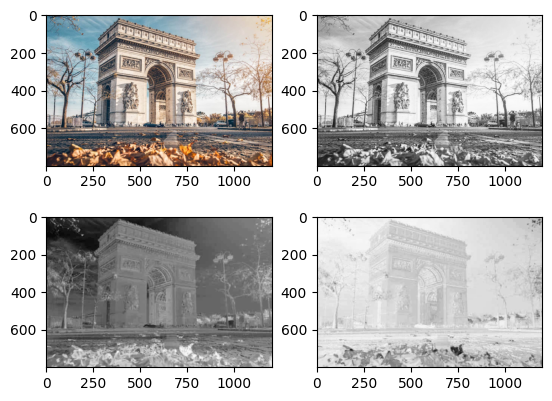

In [45]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

mask = np.array([
    [ 0.229,  0.587 ,  0.114],
    [ 0.500 ,  -0.418 , -0.082],
    [ -0.168, -0.331 ,  0.500]
])


addition = np.array([0, 128, 128])

img = cv.imread("images/example.jpg",)
img_YCbCr = img.copy(order = 'c')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for x in range(img_YCbCr.shape[0]):
    for y in range(img_YCbCr.shape[1]):
        color = img_YCbCr[x, y, :]
        new_color = np.matmul(mask, color)
        new_color = np.add(addition, new_color)
        np.clip(new_color, 0, 255)
        img_YCbCr[x, y, :] = new_color
        

fig, ax = plt.subplots(2, 2)
 
ax[0][0].imshow(img)  
ax[0][1].imshow(img_YCbCr[:,:,0], cmap="Greys_r") 
ax[1][0].imshow(img_YCbCr[:,:,2], cmap="Greys_r") 
ax[1][1].imshow(img_YCbCr[:,:,1], cmap="Greys_r") 

# Zadanie 4

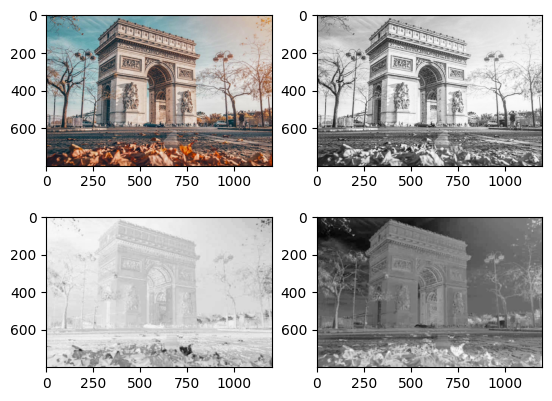

In [46]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

mask = np.array([
    [ 0.229,  0.587 ,  0.114],
    [ 0.500 ,  -0.418 , -0.082],
    [ -0.168, -0.331 ,  0.500]
])


addition = np.array([0, 128, 128])

# conversion from BGR to YCbCr
img = cv.imread("images/example.jpg")
img_YCbCr = img.copy(order = 'c')

for x in range(img_YCbCr.shape[0]):
    for y in range(img_YCbCr.shape[1]):
        color = img_YCbCr[x, y, :]
        new_color = np.matmul(mask, color)
        new_color = np.add(addition, new_color)
        np.clip(new_color, 0, 255)
        img_YCbCr[x, y, :] = new_color
        
#downsampling Cb and Cr channels
half_height = int(img_YCbCr.shape[0]/2)
half_width = int(img_YCbCr.shape[1]/2)

downsampled_Cb = np.empty((half_height, half_width))
downsampled_Cr = np.empty((half_height, half_width))

for x in range(0, img_YCbCr.shape[0], 2):
    for y in range(0, img_YCbCr.shape[1], 2):
        downsampled_Cb[int(x / 2), int(y / 2)] = img_YCbCr[x, y, 1]
        downsampled_Cr[int(x / 2), int(y / 2)] = img_YCbCr[x, y, 2]
        
#upsampling Cb and Cr channels
upsampled_Cb = np.empty((half_height * 2, half_width * 2))
upsampled_Cr = np.empty((half_height * 2, half_width * 2))

for x in range(downsampled_Cb.shape[0]):
    for y in range(downsampled_Cb.shape[1]):
        upsampled_Cb[2 * x, 2 * y] = downsampled_Cb[x, y] # top left index
        upsampled_Cb[2 * x + 1, 2 * y] = downsampled_Cb[x, y] # top right index
        upsampled_Cb[2 * x, 2 * y + 1] = downsampled_Cb[x, y] # bottom left index
        upsampled_Cb[2 * x + 1, 2 * y + 1] = downsampled_Cb[x, y] # bottom right index
        
        upsampled_Cr[2 * x, 2 * y] = downsampled_Cr[x, y] # top left index
        upsampled_Cr[2 * x + 1, 2 * y] = downsampled_Cr[x, y] # top right index
        upsampled_Cr[2 * x, 2 * y + 1] = downsampled_Cr[x, y] # bottom left index
        upsampled_Cr[2 * x + 1, 2 * y + 1] = downsampled_Cr[x, y] # bottom right index
    
sent_image = cv.merge([
    img_YCbCr[:,:,0].astype(np.uint8),
    upsampled_Cr.astype(np.uint8),
    upsampled_Cb.astype(np.uint8)
])
sent_image_RGB = cv.cvtColor(sent_image, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(2, 2)
 
ax[0, 0].imshow(sent_image_RGB)  
ax[0, 1].imshow(img_YCbCr[:,:,0], cmap="Greys_r") 
ax[1, 0].imshow(upsampled_Cb, cmap="Greys_r") 
ax[1, 1].imshow(upsampled_Cr, cmap="Greys_r")     

# Zadanie 5

In [48]:
mse = 0
mse_png = 0
pixels_count = img.shape[0] * img.shape[1]
img_png = cv.imread("images/example.png")

for x in range(img.shape[0]): 
    for y in range(img.shape[1]):
        mse += (float(img[x, y, 0]) - float(sent_image_RGB[x, y, 0])) ** 2
        mse += (float(img[x, y, 1]) - float(sent_image_RGB[x, y, 1])) ** 2
        mse += (float(img[x, y, 2]) - float(sent_image_RGB[x, y, 2])) ** 2
        
        mse_png += (float(img_png[x, y, 0]) - float(sent_image_RGB[x, y, 0])) ** 2
        mse_png += (float(img_png[x, y, 1]) - float(sent_image_RGB[x, y, 1])) ** 2
        mse_png += (float(img_png[x, y, 2]) - float(sent_image_RGB[x, y, 2])) ** 2
        
mse /= (pixels_count * 3)
mse_png /= (pixels_count * 3)

print(mse)
print(mse_png)

1381.611282638889
1381.611282638889
